<a href="https://colab.research.google.com/github/tomektom10/dataScienceBootCamp/blob/main/sie%C4%87neuronowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_excel("CUKIER_MAR24_30.xlsx")
#df = pd.read_csv("brent-jn24_dane-5min.csv",sep=";")
df
df.columns
import numpy as np
import calendar
import datetime
import matplotlib.pyplot as plt


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
df

,Timestamp,Open,High,Low,Close,SMA (30),SMA (15)
0,2023-12-19 09:30:00,0.64,0.65,0.47,0.56,NaN,NaN
1,2023-12-19 10:00:00,0.56,0.57,0.54,0.55,NaN,NaN
2,2023-12-19 10:30:00,0.55,0.57,0.55,0.56,NaN,NaN
3,2023-12-19 11:00:00,0.56,0.57,0.56,0.56,NaN,NaN
4,2023-12-19 11:30:00,0.55,0.56,0.55,0.56,NaN,NaN
...,...,...,...,...,...,...,...
470,2024-01-21 10:30:00,NaN,NaN,NaN,NaN,NaN,NaN
471,2024-01-21 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN
472,2024-01-21 11:30:00,NaN,NaN,NaN,NaN,NaN,NaN
473,2024-01-21 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  475 non-null    datetime64[ns]
 1   Open       375 non-null    float64       
 2   High       375 non-null    float64       
 3   Low        375 non-null    float64       
 4   Close      375 non-null    float64       
 5   SMA (30)   346 non-null    float64       
 6   SMA (15)   361 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 26.1 KB


In [ ]:
df = df.dropna()

In [ ]:
#df["Close"] = df["Close"].str.replace(",", ".").astype(float)

In [ ]:
df

,Timestamp,Open,High,Low,Close,SMA (30),SMA (15)
29,2023-12-20 14:30:00,0.51,0.52,0.49,0.49,0.53,0.51
30,2023-12-20 15:00:00,0.48,0.50,0.48,0.50,0.53,0.50
31,2023-12-20 15:30:00,0.49,0.50,0.49,0.49,0.53,0.50
32,2023-12-20 16:00:00,0.49,0.50,0.49,0.50,0.53,0.49
33,2023-12-20 16:30:00,0.50,0.50,0.44,0.47,0.52,0.49
...,...,...,...,...,...,...,...
370,2024-01-18 18:00:00,0.70,0.73,0.69,0.72,0.66,0.66
371,2024-01-18 18:30:00,0.72,0.77,0.71,0.77,0.67,0.67
372,2024-01-19 09:30:00,0.78,0.81,0.77,0.79,0.67,0.68
373,2024-01-19 10:00:00,0.79,0.80,0.78,0.78,0.67,0.69


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
windows_size = 5
split_point = 0.9
split_point_nb = int(split_point * len(df))

In [ ]:
#skalowanie do sieci nauronowych

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [ ]:
trein,test = scaled_data[0:split_point_nb], scaled_data[split_point_nb:]

In [ ]:
def generuj_okienka(data, windows_size):
  windows = []
  y = []
  for i in range(len(data) -windows_size):
    window = data[i:i+windows_size]
    windows.append(window)
    y.append(data[i+windows_size])
  return np.array(windows),np.array(y)



In [ ]:
x_train, y_train = generuj_okienka(trein, windows_size)

In [ ]:
x_test, y_test = generuj_okienka(test, windows_size)

In [ ]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#ARCHITEKTURA SIECI TU MOGE MODYFOKOWAC moge zwiekszyc LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(windows_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 2s 45ms/step - loss: 0.1034 - val_loss: 0.3101
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0684 - val_loss: 0.2139
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0400 - val_loss: 0.1275
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0190 - val_loss: 0.0549
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0093 - val_loss: 0.0157
Epoch 6/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0089 - val_loss: 0.0124
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0071 - val_loss: 0.0206
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0061 - val_loss: 0.0182
Epoch 9/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0052 - val_loss: 0.0098
Epoch 10/100
8/8 [==============================] - 0s 11ms/step - loss: 0.0042 - val_loss: 0.0066
Epoch 11/100
8/8 [========

In [ ]:
predictions = model.predict(x_test)


1/1 [==============================] - 0s 161ms/step


In [ ]:
predictions_real = scaler.inverse_transform(predictions)

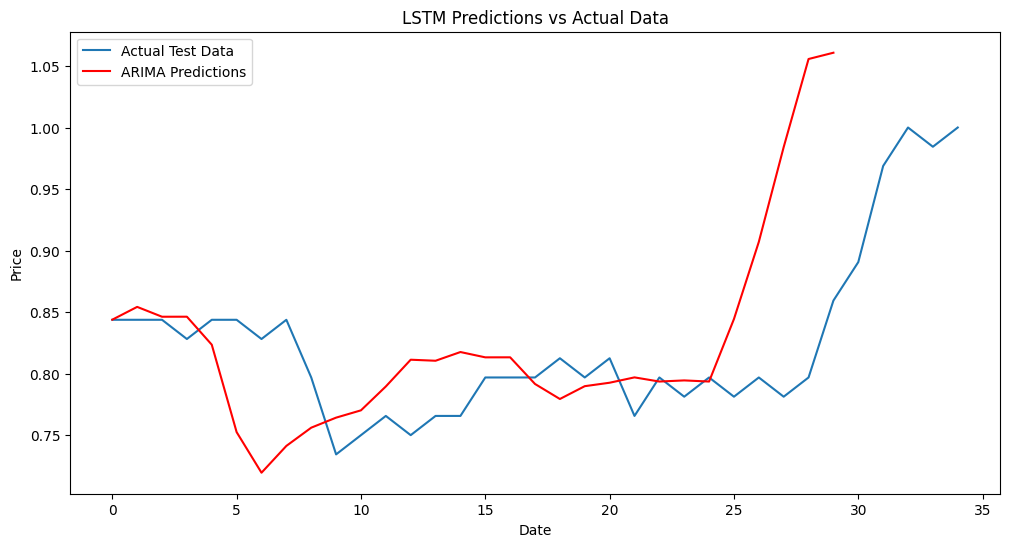

In [ ]:
# Plotting the results
plt.figure(figsize=(12, 6))
#plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data')
plt.plot(predictions, label='ARIMA Predictions', color='red')
plt.title('LSTM Predictions vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(x_test)

1/1 [==============================] - 0s 21ms/step


In [ ]:
x_test[0]

array([[0.84375 ],
       [0.84375 ],
       [0.84375 ],
       [0.828125],
       [0.84375 ]])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(y_test, predictions)

In [ ]:
mse

0.0012241072863331463

In [ ]:
#MSE 10 window = 0.0023883501780096184
 #     15 = 0.0034732914563747044
 # 5 = 0.002798899567247003

In [ ]:
lista_ostatnich_cen = [0.63, 0.66, 0.65, 0.77, 0.79]

In [ ]:
def zrob_predykcje(model, lista_ostatnich_cen, scaler):
  scaled_data_do_przewidywania = scaler.fit_transform(np.array(lista_ostatnich_cen).reshape(-1,1))
  predykcja_ceny = model.predict(np.array([scaled_data_do_przewidywania]))
  predykcja_ceny_real = scaler.inverse_transform(list(predictions[0].reshape(1,-1)))
  return predykcja_ceny_real

In [ ]:
#CUKIER MAR

In [ ]:
lista_ostatnich_cen = [0.72, 0.77, 0.79, 0.78, 0.79]

In [ ]:
przewidywanie = zrob_predykcje(model, lista_ostatnich_cen, scaler)

1/1 [==============================] - 0s 20ms/step


In [ ]:
przewidywanie

array([[0.77906838]])